##  Import Required Libraries

In [6]:
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 20.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 29.0 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.18.1-py3-none-any.whl size=139052 sha256=ad01451fc778ce112b88872030236eca12e5176a210aa5ed76848e2920b58b81
  Stored in directory: /Users/pranjalkharbanda/Library/Caches/pip/wheels/1a/57/6a/bb71346381d0d911cd4ce3026f1fa720da76707e4f01cf27dd
Successfully built peewee


In [10]:
import yfinance as yf  
# 📈 Yahoo Finance API wrapper
# Used to download real-world financial data (e.g., stock prices, indices, T-bill rates)

import pandas as pd  
# 🧾 Data analysis library
# Used to store, clean, and manipulate tabular data (like stock returns)

import numpy as np  
# 🔢 Numerical computing
# Used for arrays, statistical functions, and generating random numbers (e.g., for simulations)

import statsmodels.api as sm  
# 📊 Statistical modeling library
# Used to run regression analysis (OLS, time series models, etc.) and get detailed statistical output

import matplotlib.pyplot as plt  
# 📉 Basic plotting tool from matplotlib
# Used to create line plots, scatter plots, residual plots, etc.

import seaborn as sns  
# 🧠 Statistical data visualization
# Used to enhance plots with themes, regression lines, residual trends, and correlation heatmaps

from statsmodels.stats.outliers_influence import variance_inflation_factor  
# 📏 Multicollinearity diagnostic
# Used to compute VIF (Variance Inflation Factor) to detect multicollinearity in regression features

from statsmodels.stats.diagnostic import het_breuschpagan  
# 🧪 Heteroskedasticity test
# Used to perform Breusch-Pagan test to check if variance of residuals is constant (a key OLS assumption)

In [14]:
# 📥 Download monthly historical data for Apple Inc. (AAPL) stock
stock = yf.download('AAPL', start='2020-01-01', end='2023-01-01', interval='1mo')

# 📈 Download monthly data for S&P 500 Index (used as market benchmark)
market = yf.download('^GSPC', start='2020-01-01', end='2023-01-01', interval='1mo')

# 💵 Download monthly data for 13-week Treasury Bill rate (IRX), used as risk-free rate proxy
rf = yf.download('^IRX', start='2020-01-01', end='2023-01-01', interval='1mo')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [18]:
print(stock.columns)
print(market.columns)
print(rf.columns)

MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])
MultiIndex([( 'Close', '^GSPC'),
            (  'High', '^GSPC'),
            (   'Low', '^GSPC'),
            (  'Open', '^GSPC'),
            ('Volume', '^GSPC')],
           names=['Price', 'Ticker'])
MultiIndex([( 'Close', '^IRX'),
            (  'High', '^IRX'),
            (   'Low', '^IRX'),
            (  'Open', '^IRX'),
            ('Volume', '^IRX')],
           names=['Price', 'Ticker'])


In [24]:
stock.head()



Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-01,74.835632,79.270013,70.783273,71.627108,2934370400
2020-02-01,66.094994,79.117666,61.987028,73.575896,3019279200
2020-03-01,61.630032,73.677809,51.528418,68.413723,6280072400
2020-04-01,71.205719,71.382645,57.415368,59.742037,3265299200
2020-05-01,77.056320,78.583193,69.278950,69.375893,2805936000


In [26]:
market.head()

Price,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,
2020-01-01,3225.520020,3337.770020,3214.639893,3244.669922,77287980000
2020-02-01,2954.219971,3393.520020,2855.840088,3235.659912,84436590000
2020-03-01,2584.590088,3136.719971,2191.860107,2974.280029,162185380000
2020-04-01,2912.429932,2954.860107,2447.489990,2498.080078,123608160000
2020-05-01,3044.310059,3068.669922,2766.639893,2869.090088,107135190000


In [28]:
rf.head()

Price,Close,High,Low,Open,Volume
Ticker,^IRX,^IRX,^IRX,^IRX,^IRX
Date,,,,,
2020-01-01,1.510,1.535,1.460,1.510,0
2020-02-01,1.230,1.545,1.230,1.513,0
2020-03-01,0.030,3.390,-0.235,1.090,0
2020-04-01,0.090,0.260,0.040,0.085,0
2020-05-01,0.128,0.140,0.078,0.088,0


In [30]:
print(stock.head())
print(market.head())
print(rf.head())

Price           Close       High        Low       Open      Volume
Ticker           AAPL       AAPL       AAPL       AAPL        AAPL
Date                                                              
2020-01-01  74.835632  79.270013  70.783273  71.627108  2934370400
2020-02-01  66.094994  79.117666  61.987028  73.575896  3019279200
2020-03-01  61.630032  73.677809  51.528418  68.413723  6280072400
2020-04-01  71.205719  71.382645  57.415368  59.742037  3265299200
2020-05-01  77.056320  78.583193  69.278950  69.375893  2805936000
Price             Close         High          Low         Open        Volume
Ticker            ^GSPC        ^GSPC        ^GSPC        ^GSPC         ^GSPC
Date                                                                        
2020-01-01  3225.520020  3337.770020  3214.639893  3244.669922   77287980000
2020-02-01  2954.219971  3393.520020  2855.840088  3235.659912   84436590000
2020-03-01  2584.590088  3136.719971  2191.860107  2974.280029  162185380000
20

In [32]:
market

Price,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,
2020-01-01,3225.520020,3337.770020,3214.639893,3244.669922,77287980000
2020-02-01,2954.219971,3393.520020,2855.840088,3235.659912,84436590000
2020-03-01,2584.590088,3136.719971,2191.860107,2974.280029,162185380000
2020-04-01,2912.429932,2954.860107,2447.489990,2498.080078,123608160000
2020-05-01,3044.310059,3068.669922,2766.639893,2869.090088,107135190000
2020-06-01,3100.290039,3233.129883,2965.659912,3038.780029,131458880000
2020-07-01,3271.120117,3279.989990,3101.169922,3105.919922,96928130000
2020-08-01,3500.310059,3514.770020,3284.530029,3288.260010,82466520000


In [34]:
stock

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-01,74.835632,79.270013,70.783273,71.627108,2934370400
2020-02-01,66.094994,79.117666,61.987028,73.575896,3019279200
2020-03-01,61.630032,73.677809,51.528418,68.413723,6280072400
2020-04-01,71.205719,71.382645,57.415368,59.742037,3265299200
2020-05-01,77.056320,78.583193,69.278950,69.375893,2805936000
2020-06-01,88.652702,90.494777,77.087511,77.218742,3243375600
2020-07-01,103.292068,103.442738,86.655100,88.730470,3020283200
2020-08-01,125.435806,127.341068,104.878981,105.177887,4070061100


In [36]:
rf

Price,Close,High,Low,Open,Volume
Ticker,^IRX,^IRX,^IRX,^IRX,^IRX
Date,,,,,
2020-01-01,1.510,1.535,1.460,1.510,0
2020-02-01,1.230,1.545,1.230,1.513,0
2020-03-01,0.030,3.390,-0.235,1.090,0
2020-04-01,0.090,0.260,0.040,0.085,0
2020-05-01,0.128,0.140,0.078,0.088,0
2020-06-01,0.135,0.168,0.125,0.130,0
2020-07-01,0.083,0.143,0.083,0.135,0
2020-08-01,0.095,0.103,0.075,0.083,0


In [58]:
# Ensure each dataset downloaded successfully
assert not stock.empty, "Stock data not loaded"
assert not market.empty, "Market data not loaded"
assert not rf.empty, "Risk-free data not loaded"

# Use Close or Adj Close depending on what's available
price_col = 'Adj Close' if 'Adj Close' in stock.columns else 'Close'

# Calculate returns and risk-free rate
aapl_returns = stock[price_col].pct_change()
sp500_returns = market[price_col].pct_change()
rf_rate = rf[price_col] / 100  # Convert % to decimal

# Align all series by index (date) and drop NaNs
df = pd.concat([aapl_returns, sp500_returns, rf_rate], axis=1)
# combines three separate Pandas Series — aapl_returns, sp500_returns, and rf_rate — into a single DataFrame (df) 
# by stacking them side-by-side (column-wise).

df.columns = ['AAPL', 'S&P500', 'RF']
df = df.dropna()

In [52]:
df.head()   # checking the first 5 rows of my dataframe

,AAPL,S&P500,RF
Date,,,
2020-02-01,-0.116798,-0.084110,0.01230
2020-03-01,-0.067554,-0.125119,0.00030
2020-04-01,0.155374,0.126844,0.00090
2020-05-01,0.082165,0.045282,0.00128
2020-06-01,0.150492,0.018388,0.00135


In [54]:
df.shape

(35, 3)

In [56]:
df.isna().sum()  # check for missing values

AAPL      0
S&P500    0
RF        0
dtype: int64

## Estimate Excess Returns and CAPM Regression

In [67]:
# 🧮 Step 1: Calculate Excess Return for AAPL (stock return - risk-free rate)
df['AAPL_excess'] = df['AAPL'] - df['RF']

# 🧮 Step 2: Calculate Excess Return for the Market (S&P500 return - risk-free rate)
df['Market_excess'] = df['S&P500'] - df['RF']

In [ ]:
# 🎯 Step 3: Define the independent variable (X) - Market excess return + constant (intercept/alpha)
X = sm.add_constant(df['Market_excess'])  # adds column of 1s for estimating intercept α

# 🎯 Step 4: Define the dependent variable (y) - AAPL excess return
y = df['AAPL_excess']

In [71]:
# 🧪 Step 5: Fit OLS regression model (AAPL_excess = α + β * Market_excess + ε)
model = sm.OLS(y, X).fit()

In [73]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            AAPL_excess   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     66.86
Date:                Thu, 29 May 2025   Prob (F-statistic):           1.93e-09
Time:                        10:39:38   Log-Likelihood:                 50.021
No. Observations:                  35   AIC:                            -96.04
Df Residuals:                      33   BIC:                            -92.93
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0135      0.010      1.338

## Test for Multicollinearity

In [76]:
X_full = df[['Market_excess']]  # Step 1: Define independent variables (can include more features if needed)

In [78]:
X_full = sm.add_constant(X_full)  # Step 2: Add intercept term (constant) for regression analysis

In [80]:
# VIF quantifies how much a variable is linearly predicted by other variables.

In [82]:
X_full.columns

Index(['const', 'Market_excess'], dtype='object')

In [84]:
X_full.shape[1] # gives number of columns

2

In [96]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create an empty list to store VIF values
vif_values = []

# Loop through each column index (feature) in the design matrix
for i in range(X_full.shape[1]):
    # Compute VIF for the i-th feature
    vif_i = variance_inflation_factor(X_full.values, i)

    # Append result to the list
    vif_values.append(vif_i)

# Create a new DataFrame to store results
vif = pd.DataFrame()

# Add the VIF values and corresponding feature names
vif["feature"] = X_full.columns
vif["VIF"] = vif_values


# Display
print(vif)



# easy one liner list comprehension code
# vif["VIF"] = [variance_inflation_factor(X_full.values, i) for i in range(X_full.shape[1])]

         feature       VIF
0          const  1.000268
1  Market_excess  1.000000


This is not surprising since we have just one variable + constant, VIF should be close to 1 — **no multicollinearity**.

## Check for Heteroskedasticity (Breush-Pagan)

In [101]:
residuals = model.resid
bp_test = het_breuschpagan(residuals, X)
labels = ['LM stat', 'LM p-value', 'F stat', 'F p-value']
print(dict(zip(labels, bp_test)))

{'LM stat': 1.1428866348216187, 'LM p-value': 0.2850431923685178, 'F stat': 1.11395376629784, 'F p-value': 0.2988902278099546}


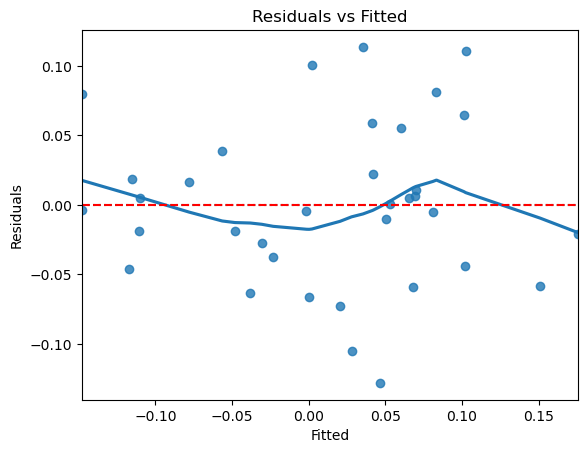

In [103]:
sns.residplot(x=model.fittedvalues, y=residuals, lowess=True)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Fitted")
plt.xlabel("Fitted")
plt.ylabel("Residuals")
plt.show()

In [105]:
import os
os.path.abspath("CAPM_Regression Diagnostics.ipynb")

'/Users/pranjalkharbanda/CAPM_Regression Diagnostics.ipynb'